# Book Review Sentiment Analysis and Book Recommendation System


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
books_rating = pd.read_csv('data\Books_rating.csv')
books_rating.head()


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [4]:
books_data = pd.read_csv('data\books_data.csv')
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [5]:
books_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [6]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [7]:
data_sem = pd.merge(books_rating,books_data, on = 'Title')
data_sem.shape

(3000000, 19)

# Data Preprocessing

In [8]:
data_sem.drop_duplicates(inplace = True)
data_sem.shape

(2991226, 19)

In [9]:
nan_cols = data_sem.columns[data_sem.isna().any()].tolist()
print(nan_cols)
data_sem.isna().sum()

['Title', 'Price', 'User_id', 'profileName', 'review/summary', 'review/text', 'description', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories', 'ratingsCount']


Id                          0
Title                     208
Price                 2510854
User_id                558559
profileName            558658
review/helpfulness          0
review/score                0
review/time                 0
review/summary             38
review/text                 8
description            638314
authors                389373
image                  538679
previewLink            329541
publisher              780240
publishedDate          353315
infoLink               329541
categories             549679
ratingsCount          1357238
dtype: int64

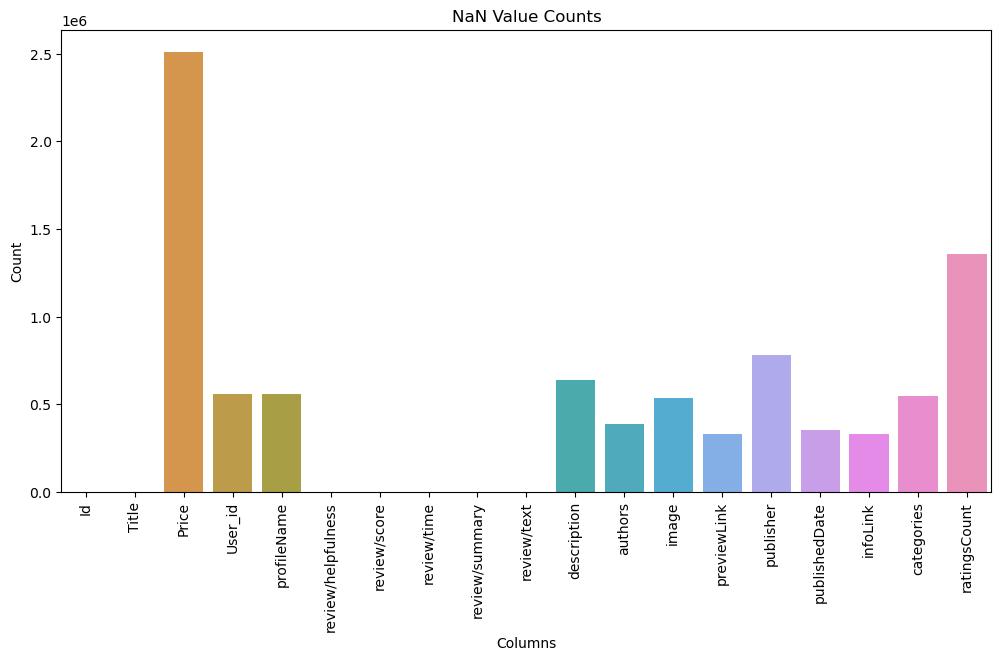

In [10]:
nan_counts = data_sem.isnull().sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values)
plt.xticks(rotation=90)
plt.title('NaN Value Counts')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

In [11]:
#dropping price column
df_processed= data_sem.drop(['Price','description','image','publishedDate','publisher'],axis=1)
df_processed = df_processed.dropna(subset=['review/summary','Title', 'review/text'])

In [12]:
df_processed['authors'] = df_processed['authors'].str.extract(r'\'(.*)\'')
df_processed['categories'] = df_processed['categories'].str.extract(r'\'(.*)\'')
df_processed['word_count'] = df_processed['review/text'].apply(lambda x: len(x.split(' ')))

In [13]:
nan_cols = df_processed.columns[df_processed.isna().any()].tolist()
print(nan_cols)
df_processed.isna().sum()

['User_id', 'profileName', 'authors', 'previewLink', 'infoLink', 'categories', 'ratingsCount']


Id                          0
Title                       0
User_id                558530
profileName            558625
review/helpfulness          0
review/score                0
review/time                 0
review/summary              0
review/text                 0
authors                403699
previewLink            329536
infoLink               329536
categories             559553
ratingsCount          1357224
word_count                  0
dtype: int64

In [14]:
df_processed['categories'].fillna('Other', inplace=True)
df_processed['authors'].fillna('Unknown', inplace=True)
df_processed['previewLink'].fillna('Unknown', inplace=True)
df_processed['infoLink'].fillna('Unknown', inplace=True)
df_processed.head(20)

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,authors,previewLink,infoLink,categories,ratingsCount,word_count
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,http://books.google.nl/books?id=DykPAAAACAAJ&d...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,Comics & Graphic Novels,NaN,86
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,252
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,310
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,560
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,273
5,0826414346,Dr. Seuss: American Icon,A2F6NONFUDB6UK,Malvin,2/2,4.0,1127174400,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",Philip Nel,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,298
6,0826414346,Dr. Seuss: American Icon,A14OJS0VWMOSWO,Midwest Book Review,3/4,5.0,1100131200,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...,Philip Nel,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,87
7,0826414346,Dr. Seuss: American Icon,A2RSSXTDZDUSH4,J. Squire,0/0,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...,Philip Nel,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,210
8,0826414346,Dr. Seuss: American Icon,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0/0,5.0,1209859200,And to think that I read it on the tram!,Trams (or any public transport) are not usuall...,Philip Nel,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,63
9,0826414346,Dr. Seuss: American Icon,A3VA4XFS5WNJO3,Donald Burnside,3/5,4.0,1076371200,Fascinating account of a genius at work,"As far as I am aware, this is the first book-l...",Philip Nel,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,243


In [15]:
df_processed_subset = df_processed[~df_processed.ratingsCount.isna()]
df_processed_subset.shape

(1633748, 15)

In [16]:
df_processed_subset50k = df_processed_subset.sample(n = 50000, random_state=42, ignore_index=True)
df_processed_subset50k.shape

(50000, 15)

In [17]:
# initialize NLTK objects for text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# define functions for text preprocessing
def clean_text(text):
    # remove urls
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    # remove unwanted characters
    text = re.sub(r'[^\w\s]', '', text)
    # remove @ and # symbols
    text = re.sub(r'@\w+|\#', '', text)
    # convert to lowercase
    text = text.lower()
    # remove stopwords and lemmatize words
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [18]:
x = df_processed['review/text'][2]
print(x)

If people become the books they read and if "the child is father to the man," then Dr. Seuss (Theodor Seuss Geisel) is the most influential author, poet, and artist of modern times. For me, a daddy to a large family who learned to read with Dr. Seuss and who has memorized too many of the books via repeated readings to young children, Prof. Nel's brilliant 'American Icon' is a long awaited treat. At last a serious treatment of this remarkable genius that is both an engaging read and filled with remarkable insights! I especially enjoyed (and learned more than I care to admit from) Prof. Nel's discussions of the Disneyfication of Seuss - which Nel links to failings in American copyright law, "the other sides of Dr. Seuss" - all of which sides were new to me, and the political genesis of his secular morality in the WWII cartoon work he did at PM magazine. The chapters on Geisel's poetry and artwork and the link Nel makes between Seuss and the historical avant guarde alone make this book a 

In [19]:
print(x)
print('\n')
print(clean_text(x))

If people become the books they read and if "the child is father to the man," then Dr. Seuss (Theodor Seuss Geisel) is the most influential author, poet, and artist of modern times. For me, a daddy to a large family who learned to read with Dr. Seuss and who has memorized too many of the books via repeated readings to young children, Prof. Nel's brilliant 'American Icon' is a long awaited treat. At last a serious treatment of this remarkable genius that is both an engaging read and filled with remarkable insights! I especially enjoyed (and learned more than I care to admit from) Prof. Nel's discussions of the Disneyfication of Seuss - which Nel links to failings in American copyright law, "the other sides of Dr. Seuss" - all of which sides were new to me, and the political genesis of his secular morality in the WWII cartoon work he did at PM magazine. The chapters on Geisel's poetry and artwork and the link Nel makes between Seuss and the historical avant guarde alone make this book a 

In [20]:
df_processed_subset50k['cleaned_review/text'] = df_processed_subset50k['review/text'].apply(clean_text)

In [21]:
df_processed_subset50k.info()
df_processed_subset50k.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   50000 non-null  object 
 1   Title                50000 non-null  object 
 2   User_id              40118 non-null  object 
 3   profileName          40113 non-null  object 
 4   review/helpfulness   50000 non-null  object 
 5   review/score         50000 non-null  float64
 6   review/time          50000 non-null  int64  
 7   review/summary       50000 non-null  object 
 8   review/text          50000 non-null  object 
 9   authors              50000 non-null  object 
 10  previewLink          50000 non-null  object 
 11  infoLink             50000 non-null  object 
 12  categories           50000 non-null  object 
 13  ratingsCount         50000 non-null  float64
 14  word_count           50000 non-null  int64  
 15  cleaned_review/text  50000 non-null 

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,authors,previewLink,infoLink,categories,ratingsCount,word_count,cleaned_review/text
0,1558006915,Dr. Jekyll and Mr. Hyde,A2P6EAEKF961Y8,"John T. Bibber ""sysadm""",0/0,5.0,1357948800,excellent xaction,"found it, purchased it at a good price, delive...",Robert Louis Stevenson,http://books.google.com/books?id=kd0WbZeAaCYC&...,https://play.google.com/store/books/details?id...,Fiction,11.0,20,found purchased good price delivered timely wo...
1,B000KS34X2,A Connecticut Yankee in King Arthur's Court,A1LMBM1N4EXS5W,"thepaxdomini ""The Book Review""",2/3,4.0,1194566400,A CONNECTICUT YANKEE IN KING ARTHUR'S COURT,The title also happens to be the plot outline....,Mark Twain,http://books.google.nl/books?id=xi73sbkM1-wC&d...,http://books.google.nl/books?id=xi73sbkM1-wC&d...,Fiction,7.0,223,title also happens plot outline element plot d...
2,B000BUGDZ0,Brave New World,A3QFE1H3RUP6Z7,"Shantell Powell ""The ShanMonster""",1/1,5.0,1044489600,Just as relevant now as then,"When I began reading it, I must admit I expect...",Aldous Huxley,http://books.google.nl/books?id=kKh5Dyqxx-QC&p...,https://play.google.com/store/books/details?id...,Fiction,2713.0,167,began reading must admit expected certain date...
3,0941533107,Playing with Water: Passion & Solitude on a Ph...,A3Q4RHFE4HZQ81,Jejujohnny,0/1,5.0,1330041600,Get lost to be found,This is a great book about about personal intr...,James Hamilton-Paterson,http://books.google.com/books?id=5Y7DAAAAQBAJ&...,https://play.google.com/store/books/details?id...,Religion,2.0,46,great book personal introspection would say co...
4,1582790337,Wuthering Heights,A2Q38O9OMH9TGF,ciararosesmith,0/0,5.0,1361318400,A classic,Can anyone ever get sick of reading Wuthering ...,Emily Bronte,http://books.google.com/books?id=b3ctQ5L7zNoC&...,https://play.google.com/store/books/details?id...,Other,4.0,21,anyone ever get sick reading wuthering height ...


## EDA

### Average rating score of books

In [22]:
df_stat = df_processed.groupby('Title')['review/score'].mean().reset_index()
df_stat

,Title,review/score
0,""" Film technique, "" and, "" Film acting """,4.500000
1,""" We'll Always Have Paris"": The Definitive Gui...",5.000000
2,"""... And Poetry is Born ..."" Russian Classical...",4.000000
3,"""A Titanic hero"" Thomas Andrews, shipbuilder",4.875000
4,"""A Truthful Impression of the Country"": Britis...",4.000000
...,...,...
212396,with an everlasting love,4.761905
212397,work and Motivation,5.000000
212398,www.whitbread.org/book,2.666667
212399,xBase Programming for the True Beginner: An In...,5.000000


In [23]:
df_stat = df_stat.sort_values(by='review/score',ascending = False, ignore_index = True)
df_stat

,Title,review/score
0,Moving Forward,5.0
1,Fuente Ovejuna (Clasicos Hispanicos) (Spanish ...,5.0
2,Fully Armed,5.0
3,Fully Alive,5.0
4,Fullness of Forgiveness,5.0
...,...,...
212396,The Comfort of Sin: Prostitutes & Prostitution...,1.0
212397,Beyond the Barrier,1.0
212398,Threat to the Cosmic Order (Mental Health Libr...,1.0
212399,"The hill,: A novel",1.0


In [24]:
bins = [0, 2, 3, 4, 5]

# create labels for the bins
labels = ['Bad', 'Okay', 'Good', 'Excellent']

# create a new column 'Bucket' based on the bins and labels
df_stat['rating_label'] = pd.cut(df_stat['review/score'], bins=bins, labels=labels)

In [25]:
df_stat

,Title,review/score,rating_label
0,Moving Forward,5.0,Excellent
1,Fuente Ovejuna (Clasicos Hispanicos) (Spanish ...,5.0,Excellent
2,Fully Armed,5.0,Excellent
3,Fully Alive,5.0,Excellent
4,Fullness of Forgiveness,5.0,Excellent
...,...,...,...
212396,The Comfort of Sin: Prostitutes & Prostitution...,1.0,Bad
212397,Beyond the Barrier,1.0,Bad
212398,Threat to the Cosmic Order (Mental Health Libr...,1.0,Bad
212399,"The hill,: A novel",1.0,Bad


In [26]:
x = pd.DataFrame(df_stat['rating_label'].value_counts().reset_index())
x

,index,rating_label
0,Excellent,137546
1,Good,52832
2,Okay,15052
3,Bad,6971


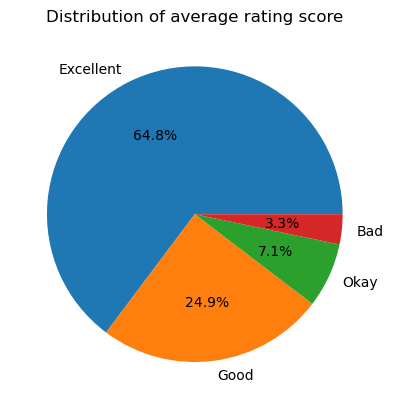

In [27]:
plt.pie(x['rating_label'], labels=x['index'], autopct='%1.1f%%')
plt.title('Distribution of average rating score')
plt.show()

### Distribution of Categories

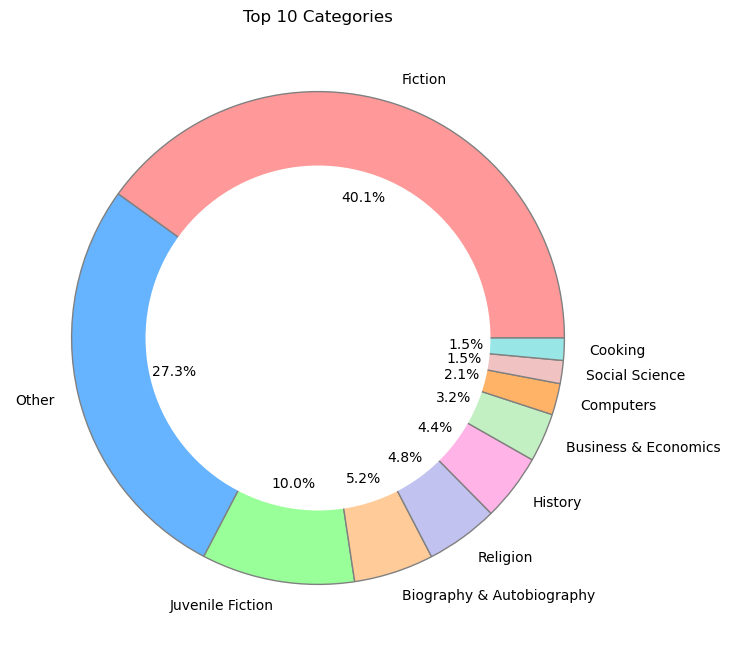

In [28]:
category_counts = df_processed['categories'].value_counts()
top_categories = category_counts.head(10)

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb366', '#f0c2c2', '#99e6e6']

fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'grey'})

center_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(center_circle)

ax.set_title('Top 10 Categories')

plt.show()




### Top Authors

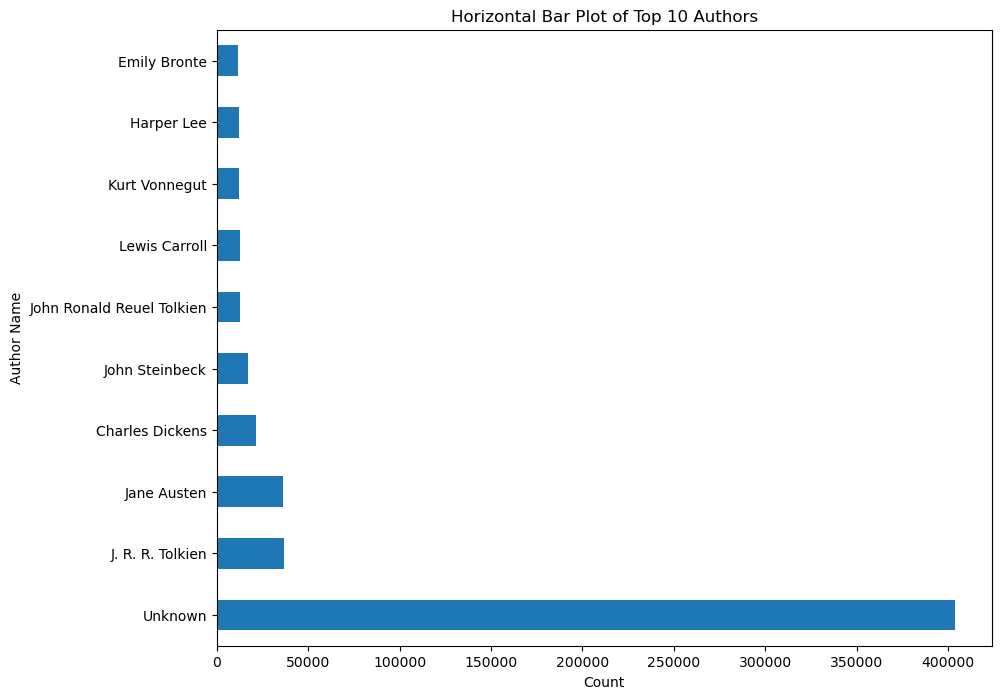

In [29]:
author_counts =df_processed['authors'].value_counts()

top_preview = author_counts.head(10)

plt.figure(figsize=(10, 8))
top_preview.plot(kind='barh', stacked=True)

plt.xlabel('Count')
plt.ylabel('Author Name')
plt.title('Horizontal Bar Plot of Top 10 Authors')

# Display the plot
plt.show()

###  Ratings Count vs Word Count

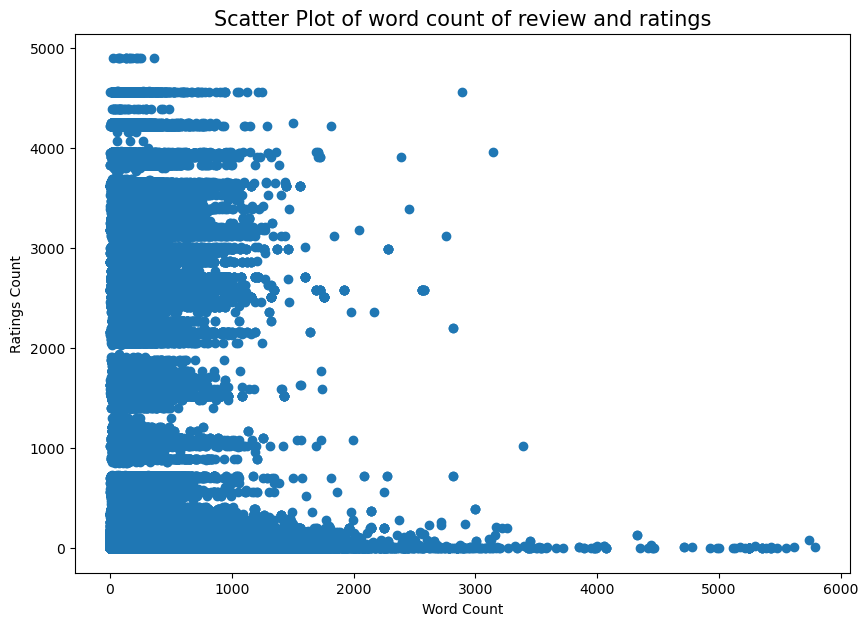

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(df_processed['word_count'], df_processed['ratingsCount'])
plt.title('Scatter Plot of word count of review and ratings', fontsize=15)
plt.xlabel('Word Count')
plt.ylabel('Ratings Count')
plt.show()

### Category Vs Count

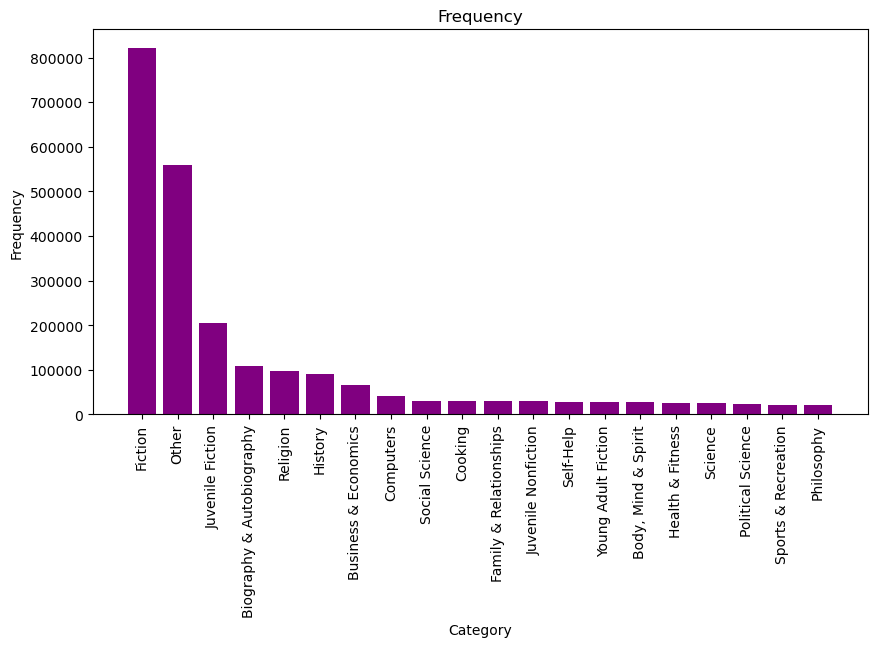

In [31]:
category_counts = df_processed['categories'].value_counts().head(20).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(category_counts.index, category_counts.values, color='purple')
ax.set_xlabel('Category')
ax.set_ylabel('Frequency')
ax.set_title('Frequency')
plt.xticks(rotation=90)
plt.show()

### Trend Line of Categories

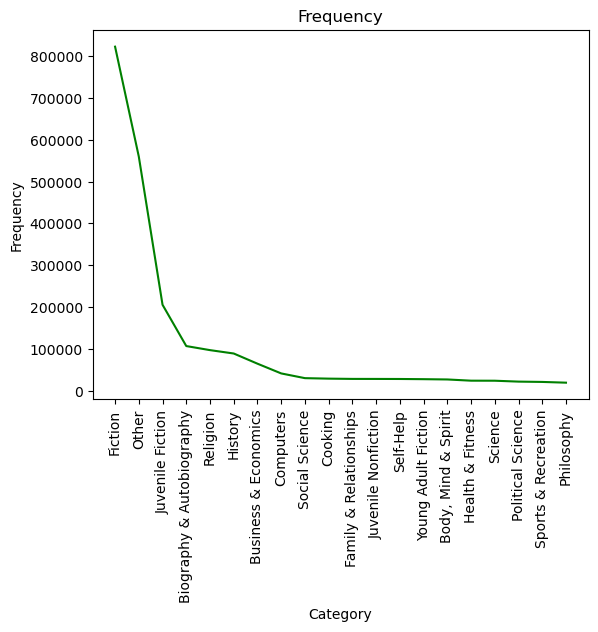

In [32]:
import matplotlib.pyplot as plt

category_counts = df_processed['categories'].value_counts().head(20).sort_values(ascending=False)
plt.plot(category_counts.index, category_counts.values, color='green')
plt.title('Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


### Most Reviewed Books 

In [33]:
df_most_review = df_processed[df_processed['review/score'] > 4.0]

In [34]:
df_most_review.shape

(1801227, 15)

In [35]:
df_most_review['Title'].nunique()

175737

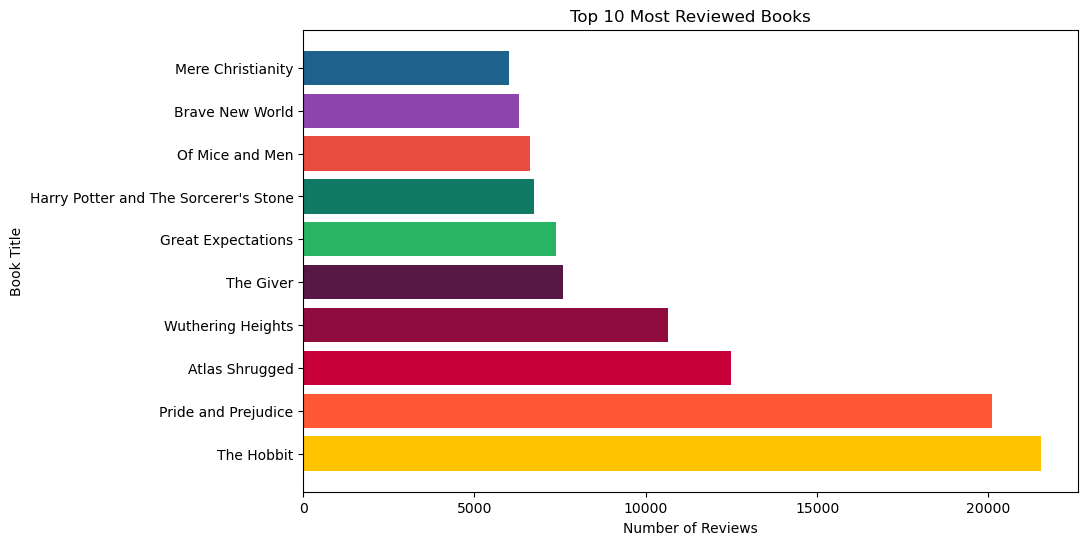

In [40]:

# Get the top 10 most reviewed books
top_books = df_processed['Title'].value_counts().nlargest(10)

# Define colors for the bars
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', 
          '#28B463', '#117A65', '#E74C3C', '#8E44AD', '#1F618D']

# Plot the top 10 most reviewed books using a horizontal bar chart with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_books.index, top_books.values, color=colors)
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Book Title')
ax.set_title('Top 10 Most Reviewed Books')

plt.show()


In [37]:
grouped_df = df_processed.groupby(['categories'])['review/score'].sum().sort_values(ascending=False).reset_index()

In [38]:
grouped_df.head()

,categories,review/score
0,Fiction,3379610.0
1,Other,2357727.0
2,Juvenile Fiction,917672.0
3,Biography & Autobiography,458106.0
4,Religion,424500.0


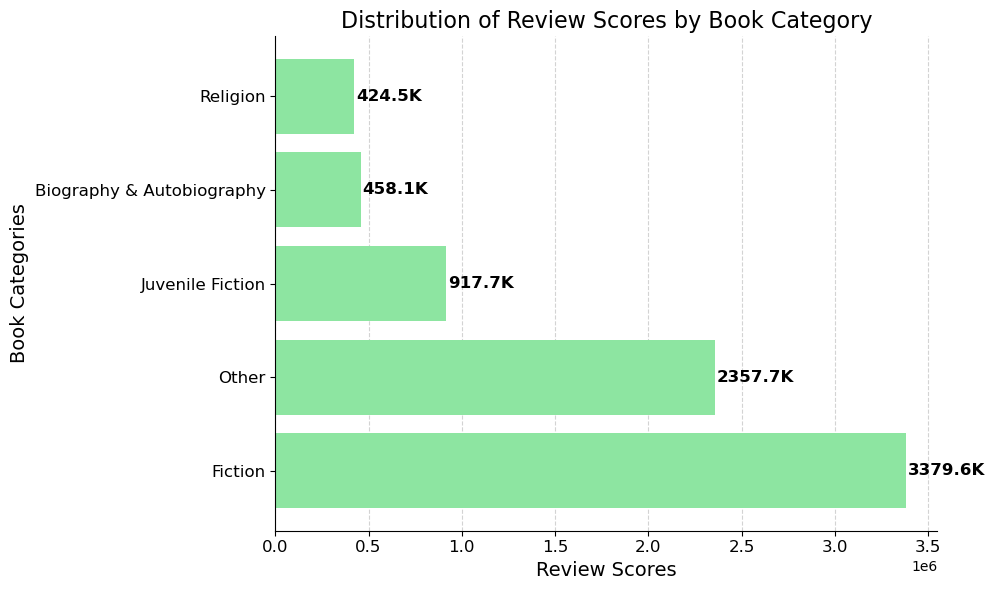

In [39]:


# Define the data
categories = ['Fiction', 'Other', 'Juvenile Fiction', 'Biography & Autobiography', 'Religion']
scores = [3379610.0, 2357727.0, 917672.0, 458106.0, 424500.0]

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(categories, scores, color=sns.color_palette('pastel')[2])

# Customize the appearance
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(color='lightgrey', linestyle='--')
ax.set_axisbelow(True)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Review Scores', fontsize=14)
ax.set_ylabel('Book Categories', fontsize=14)
ax.set_title('Distribution of Review Scores by Book Category', fontsize=16)

# Add annotations to the bars
for i, score in enumerate(scores):
    ax.annotate(f'{score/1000:.1f}K', xy=(score+10000, i), va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()